### <div align="center">Human Bones Classification System</div>
---
#### Student Information
- **Name:**  Ketan Polawar
- **Roll Number:** D-40
---
#### DataSet 
| Serial Number | Classification |
|---------------|----------------|
| 1             | Ribs           |
| 2             | Skull          |
| 3             | Femur          |
| 4             | Vertebrae      |
| 5             | Phalanges      |
| 6             | clavicle       |
| 7             | Pelvic Gridle  |
---
#### Result
| Model Used    | Accuracy       | 
|---------------|----------------|
| CNN           | 95.11          |
| Alexnet       | 94.50          |      
| Imagenet      | 94.50          |


In [18]:
import pandas as pd
# 2. numpy : Python library hels accesss the mathematical functions ,etc.
import numpy as np
# 3. matplotlib : build upon the numpy module helps to plot various graphs
import matplotlib.pyplot as plt 
# 4. tensorflow : important module which helps to work with image data set also has keras to use layering properties
import tensorflow as tf
from tensorflow import keras
from keras import layers
from  keras import Sequential

In [19]:
#our data is in the form of folders ,in order to accesss the images using tensorfolw function we need folders path ,and that is done here
dataurl=r"C:\Users\DHANSHRI\Desktop\Classification\Projects\unified"

In [20]:
import splitfolders
splitfolders.ratio('unified', output="output", seed=1337, ratio=(0.8, 0.1,0.1))

Copying files: 1834 files [00:13, 134.70 files/s]


In [21]:
data_train_path =r'C:\Users\DHANSHRI\Desktop\Classification\Projects\output\train'
data_test_path=r'C:\Users\DHANSHRI\Desktop\Classification\Projects\output\test'
data_val_path=r'C:\Users\DHANSHRI\Desktop\Classification\Projects\output\val'

In [22]:
data_train= tf.keras.utils.image_dataset_from_directory(
    data_train_path,#path of folder
    shuffle=True,#its like random state 
    batch_size=32,
    validation_split=False
)

Found 1983 files belonging to 8 classes.


In [23]:
data_val= tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    batch_size=32,
    validation_split=False #we alreay have validation data set hence no need to split it again
)

Found 325 files belonging to 8 classes.


In [24]:
data_test= tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 350 files belonging to 8 classes.


In [25]:
data_cat=data_train.class_names

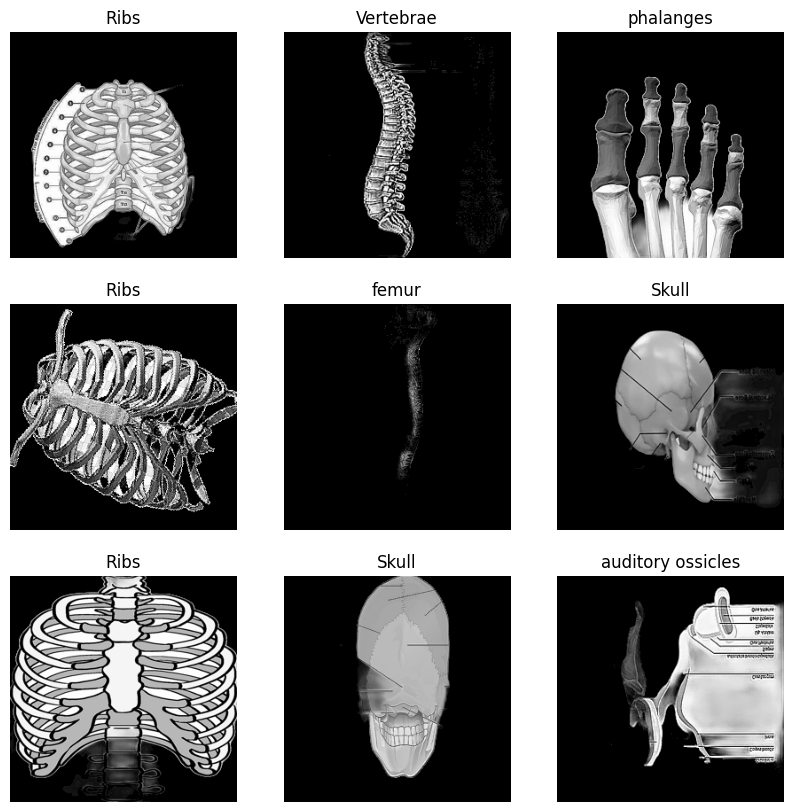

In [26]:
plt.figure(figsize=(10,10))
for image ,lables in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)#formation of grid  3*3 image matrix
        plt.imshow(image[i].numpy().astype('uint8'))#imshow helps to display images
        plt.title(data_cat[lables[i]])#fetching the titles from previously form lables list
        plt.axis('off')#hides the axix

In [10]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.regularizers import l2

num_classes = 8  # Number of classes in your dataset

# Define the L2 regularization strength
l2_regularization = 0.01  # You can adjust this value based on your needs

# Define the model architecture with L2 regularization
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=l2(l2_regularization)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=l2(l2_regularization)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(l2_regularization)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(l2_regularization)),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the best model weights
)




In [32]:
epochs_size=25
history= model.fit(data_train,validation_data=data_val,epochs=epochs_size,batch_size=32,verbose=1)

Epoch 1/25


62/62 [==============================] - 32s 478ms/step - loss: 3.0578 - accuracy: 0.3404 - val_loss: 2.0184 - val_accuracy: 0.5354
Epoch 2/25
62/62 [==============================] - 29s 462ms/step - loss: 2.0846 - accuracy: 0.5290 - val_loss: 1.8169 - val_accuracy: 0.7415
Epoch 3/25
62/62 [==============================] - 29s 466ms/step - loss: 2.0072 - accuracy: 0.6631 - val_loss: 1.8553 - val_accuracy: 0.7569
Epoch 4/25
62/62 [==============================] - 30s 478ms/step - loss: 1.8367 - accuracy: 0.7670 - val_loss: 1.9243 - val_accuracy: 0.7815
Epoch 5/25
62/62 [==============================] - 31s 492ms/step - loss: 1.7314 - accuracy: 0.8321 - val_loss: 1.8558 - val_accuracy: 0.8092
Epoch 6/25
62/62 [==============================] - 30s 477ms/step - loss: 1.6384 - accuracy: 0.8613 - val_loss: 2.0995 - val_accuracy: 0.7846
Epoch 7/25
62/62 [==============================] - 29s 464ms/step - loss: 1.7301 - accuracy: 0.8729 - val_loss: 1.9956 - val_accuracy: 0.8338
Epoch 8/25

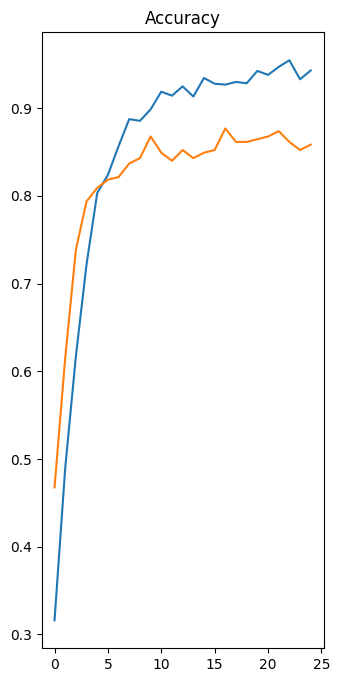

Text(0.5, 1.0, 'Loss')

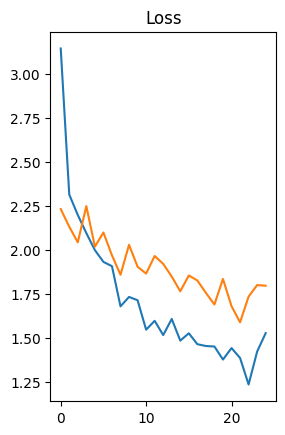

In [27]:
epochs_range =range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.show()

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('Loss')


In [28]:
import tensorflow as tf
import keras
i = 'C:/Users/DHANSHRI/Desktop/Classification/Projects/unified/phalanges/sortedsceneenglishskeletalupper-extremity34phalanges-of-hand_medium.jpg'
image =tf.keras.utils.load_img(i,target_size=(256,256))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

# # Predict with the model
predict = model.predict(img_bat)
print(predict)

1/1 [==============================] - 0s 116ms/step
[[3.0832177e-02 9.6186483e-03 6.4928100e-02 2.8420100e-05 2.5778643e-03
  3.9686365e-05 2.5644744e-04 8.9171869e-01]]


In [29]:
score=tf.nn.softmax(predict)

In [30]:

print('the bone in image is {} '.format(data_cat[np.argmax(score)]))

the bone in image is phalanges 


In [40]:
from tensorflow.keras import layers, Sequential, callbacks

num_classes = 8  # Number of classes in your dataset

# AlexNet architecture
model = Sequential([
    layers.InputLayer(input_shape=(256, 256, 3)),  # Input shape suitable for AlexNet
    layers.Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the best model weights
)

# Fit the model with early stopping


In [45]:
epochs_size=20
history= model.fit(data_train,validation_data=data_val,epochs=epochs_size,batch_size=32,verbose=1)

Epoch 1/20


62/62 [==============================] - 80s 1s/step - loss: 0.8497 - accuracy: 0.6919 - val_loss: 0.8182 - val_accuracy: 0.7477
Epoch 2/20
62/62 [==============================] - 82s 1s/step - loss: 0.7759 - accuracy: 0.7181 - val_loss: 0.8470 - val_accuracy: 0.7415
Epoch 3/20
62/62 [==============================] - 101s 2s/step - loss: 0.6300 - accuracy: 0.7776 - val_loss: 0.8060 - val_accuracy: 0.7600
Epoch 4/20
62/62 [==============================] - 86s 1s/step - loss: 0.5162 - accuracy: 0.8245 - val_loss: 0.7600 - val_accuracy: 0.8154
Epoch 5/20
62/62 [==============================] - 86s 1s/step - loss: 0.6430 - accuracy: 0.7872 - val_loss: 0.6838 - val_accuracy: 0.8062
Epoch 6/20
62/62 [==============================] - 85s 1s/step - loss: 0.4761 - accuracy: 0.8361 - val_loss: 0.7812 - val_accuracy: 0.7846
Epoch 7/20
62/62 [==============================] - 86s 1s/step - loss: 0.3408 - accuracy: 0.8815 - val_loss: 0.6527 - val_accuracy: 0.8215
Epoch 8/20
62/62 [============

In [46]:
import tensorflow as tf
import keras
i = 'C:/Users/DHANSHRI/Desktop/Classification/Projects/unified/phalanges/sortedsceneenglishskeletalupper-extremity34phalanges-of-hand_medium.jpg'
image =tf.keras.utils.load_img(i,target_size=(256,256))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

# # Predict with the model
predict = model.predict(img_bat)
print(predict)

1/1 [==============================] - 0s 59ms/step
[[1.5824549e-08 1.7892164e-03 1.3184891e-07 4.4028113e-08 3.0304204e-06
  7.3781349e-11 4.6107098e-12 9.9820757e-01]]


In [47]:
score=tf.nn.softmax(predict)

In [29]:
print('the bone in image is {}'.format(data_cat[np.argmax(score)]))

the bone in image is phalanges


In [11]:
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.applications import EfficientNetB0

num_classes = 8  # Number of classes in your dataset
input_shape = (256, 256, 3)  # Input shape suitable for EfficientNetB0

# Load the pre-trained EfficientNetB0 model without including the top layers (fully connected layers)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Create a new model on top of the pre-trained base model
model = Sequential([
    base_model,  # Include the EfficientNetB0 base model
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the best model weights
)




In [14]:
epochs_size=7
history= model.fit(data_train,validation_data=data_val,epochs=epochs_size,batch_size=32,verbose=1)

Epoch 1/7
62/62 [==============================] - 298s 5s/step - loss: 0.1168 - accuracy: 0.9642 - val_loss: 0.1322 - val_accuracy: 0.9692
Epoch 2/7
62/62 [==============================] - 285s 5s/step - loss: 0.0773 - accuracy: 0.9798 - val_loss: 0.1030 - val_accuracy: 0.9815
Epoch 3/7
62/62 [==============================] - 283s 5s/step - loss: 0.0602 - accuracy: 0.9849 - val_loss: 0.0515 - val_accuracy: 0.9877
Epoch 4/7
62/62 [==============================] - 280s 5s/step - loss: 0.0516 - accuracy: 0.9849 - val_loss: 0.0146 - val_accuracy: 0.9938
Epoch 5/7
62/62 [==============================] - 285s 5s/step - loss: 0.0368 - accuracy: 0.9874 - val_loss: 0.0582 - val_accuracy: 0.9877
Epoch 6/7
62/62 [==============================] - 280s 5s/step - loss: 0.0424 - accuracy: 0.9894 - val_loss: 0.0174 - val_accuracy: 0.9969
Epoch 7/7
62/62 [==============================] - 280s 5s/step - loss: 0.0191 - accuracy: 0.9965 - val_loss: 0.0263 - val_accuracy: 0.9969


In [15]:
import tensorflow as tf
import keras
i = 'C:/Users/DHANSHRI/Desktop/Classification/Projects/unified/phalanges/sortedsceneenglishskeletalupper-extremity34phalanges-of-hand_medium.jpg'
image =tf.keras.utils.load_img(i,target_size=(256,256))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

# # Predict with the model
predict = model.predict(img_bat)
print(predict)

1/1 [==============================] - 3s 3s/step
[[3.0578955e-09 2.6848282e-10 2.3969220e-09 1.7183316e-11 4.4191603e-10
  2.5930488e-10 3.3879130e-06 9.9999666e-01]]


In [16]:
score=tf.nn.softmax(predict)

In [28]:
print('the bone in image is {}'.format(data_cat[np.argmax(score)]))

the bone in image is phalanges
